In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
import seaborn as sns

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.models import load_model

from sklearn.metrics import mean_absolute_error


In [4]:
ratings2 = pd.read_csv('dinner_lunch_recipe.csv')

rating_count2 = ratings2.groupby('recipe_id')['rating'].count().reset_index()
rating_count = rating_count2.rename(columns = {'rating':'review_count'})

threshold = 10
rating_count = rating_count.query('review_count >= @threshold')
rating_count

recipe_rating = pd.merge(rating_count, ratings2, left_on='recipe_id', right_on='recipe_id', how='left')

user_count2 = ratings2.groupby('user_id')['rating'].count().reset_index()
user_count = user_count2.rename(columns = {'rating':'user_count'})
    
threshold = 10
user_count = user_count.query('user_count >= @threshold')

ratings = pd.merge(user_count, recipe_rating, left_on = 'user_id', right_on = 'user_id', how = 'inner')

ratings.to_csv('result_MF_Dinner.csv', index=False)


In [5]:
unique_users = list(ratings['user_id'].unique())
unique_recipe = list(ratings['recipe_id'].unique())

In [6]:
unique = pd.DataFrame(unique_users).reset_index()

indexes = unique['index']
ids = unique[0]

tuple_zip = list(zip(ids, indexes))
  
dic_user = dict((x, y) for x, y in tuple_zip)
#dic_user_reverse = dict((y, x) for x, y in tuple_zip_recipe)

ratings['user_id'] = ratings['user_id'].replace(dic_user)

In [7]:
uniqueR = pd.DataFrame(unique_recipe).reset_index()

indexesR = uniqueR['index']
idsR = uniqueR[0]

tuple_zip_recipe = list(zip(idsR, indexesR))

dic_recipe = dict((x, y) for x, y in tuple_zip_recipe)
dic_recipe_reverse = dict((y, x) for x, y in tuple_zip_recipe)

ratings['recipe_id'] = ratings['recipe_id'].replace(dic_recipe)

In [8]:
ratings = ratings.drop(columns = ['user_count', 'review_count'])

In [9]:
scaler = MinMaxScaler()
ratings['rating'] = ratings['rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(ratings['rating'].values.reshape(-1,1)))
ratings['rating'] = rating_scaled

In [10]:
ratings

,user_id,recipe_id,rating
0,0,0,1.0
1,0,1,1.0
2,0,2,1.0
3,0,3,1.0
4,0,4,1.0
...,...,...,...
265382,8985,686,1.0
265383,8985,14576,1.0
265384,8985,3889,1.0
265385,8985,13352,1.0


In [11]:
train, test = train_test_split(ratings, test_size=0.2, random_state=42)
n_users = len(ratings.user_id.unique())
print('n_users:', n_users)
n_items = len(ratings.recipe_id.unique())
print('n_items:', n_items)

n_users: 8986
n_items: 14631


In [12]:

recipe_input = Input(shape=[1], name="Recipe-Input")

recipe_embedding = Embedding(n_items+1, 20, name="Recipe-Embedding")(recipe_input)
recipe_vec = Flatten(name="Flatten-Recipe")(recipe_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 20, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([recipe_vec, user_vec])
model = Model([user_input, recipe_input], prod)
model.compile(loss = 'mean_absolute_error', optimizer='adam')

In [13]:
history = model.fit([train.user_id, train.recipe_id], train.rating, epochs=100, verbose=1)
model.save('Dinner_MF_R10U10_scale.h5')

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
212309/212309 [==============================] - 16s 76us/step - loss: 0.7798
Epoch 2/100
212309/212309 [==============================] - 15s 73us/step - loss: 0.2342
Epoch 3/100
212309/212309 [==============================] - 19s 90us/step - loss: 0.1340
Epoch 4/100
212309/212309 [==============================] - 16s 77us/step - loss: 0.1210 0s - lo
Epoch 5/100
212309/212309 [==============================] - 18s 83us/step - loss: 0.1151
Epoch 6/100
212309/212309 [==============================] - 16s 77us/step - loss: 0.1102
Epoch 7/100
212309/212309 [==============================] - 16s 76us/step - loss: 0.1057
Epoch 8/100
212309/212309 [==============================] - 16s 75us/step - loss: 0.1018
Epoch 9/100
212309/212309 [==============================] - 16s 75us/step - loss: 0.0985
Epoch 10/100
212309/212309 [==============================] - 16s 74us/step - loss: 0.0958
Epoch 11/100
212309/212309 [==============================] - 16s 77us/step - loss: 0.0931 

212309/212309 [==============================] - 15s 72us/step - loss: 0.0678
Epoch 91/100
212309/212309 [==============================] - 15s 72us/step - loss: 0.0677
Epoch 92/100
212309/212309 [==============================] - 17s 81us/step - loss: 0.0677
Epoch 93/100
212309/212309 [==============================] - 16s 75us/step - loss: 0.0676
Epoch 94/100
212309/212309 [==============================] - 16s 76us/step - loss: 0.0675 0s -
Epoch 95/100
212309/212309 [==============================] - 17s 78us/step - loss: 0.0674
Epoch 96/100
212309/212309 [==============================] - 16s 77us/step - loss: 0.0671
Epoch 97/100
212309/212309 [==============================] - 17s 78us/step - loss: 0.0672
Epoch 98/100
212309/212309 [==============================] - 16s 75us/step - loss: 0.0669
Epoch 99/100
212309/212309 [==============================] - 18s 87us/step - loss: 0.0668
Epoch 100/100
212309/212309 [==============================] - 19s 89us/step - loss: 0.0670


In [16]:
#model = load_model('recommendation_model.h5')

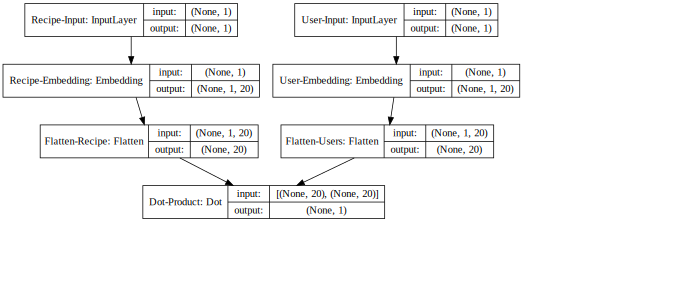

In [15]:
# plot model 


SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [25]:
#model.summary()

### Prediction of how good the model is 

In [17]:
y_hat = np.round(model.predict([test.user_id, test.recipe_id]),0)
y_true = test.rating

MAE = mean_absolute_error(y_true, y_hat)

percentage_wrong = MAE/5 * 100
percentage_wrong

MAE

0.11735935792607106

### get emmbedding layers 

In [27]:
#recipe_embedding_learnt = model.get_layer(name='Recipe-Embedding').get_weights()[0]
#pd.DataFrame(recipe_embedding_learnt).describe()

Text(0, 0.5, 'Train Error')

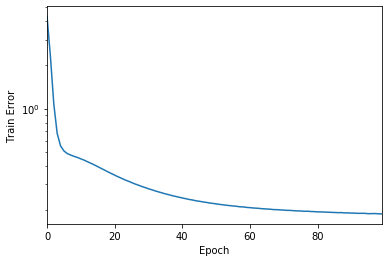

In [28]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")